# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

> ## Import Modules

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

> ## Scrapping the data

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


> ## Creating Data Frame

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | This is a route I fly regula...
1,✅ Trip Verified | While BA may have made some...
2,✅ Trip Verified | British Airways new Club Sui...
3,"✅ Trip Verified | Four very pleasant, on time..."
4,Not Verified | We travel extensively over 25...


In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

> ## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
import re

# Define a regex pattern
pattern = re.compile(r'^✅ Trip Verified \| |^Not Verified \| |^✅ Verified Review \| ')

# Function to remove the verified part using regex
def remove_verification_status(text):
    return re.sub(pattern, '', text)

# Apply the function to the entire 'reviews' column
df['reviews'] = df['reviews'].astype(str).apply(remove_verification_status)

# Print the updated dataframe
print(df)

                                                reviews
0     This is a route I fly regularly. Used first cl...
1      While BA may have made some positive improvem...
2     British Airways new Club Suite is a marked imp...
3      Four very pleasant, on time flights with frie...
4       We travel extensively over 25 years and tend...
...                                                 ...
1995   London to Cape Town. Galleries lounge at T3 t...
1996  In September 2016, I flew with British Airways...
1997   St Petersburgh to London. I don’t know where ...
1998   British Airways is a budget airline at premiu...
1999   Shanghai to Zurich via London return, and Bri...

[2000 rows x 1 columns]


In [8]:
df.head()

,reviews
0,This is a route I fly regularly. Used first cl...
1,While BA may have made some positive improvem...
2,British Airways new Club Suite is a marked imp...
3,"Four very pleasant, on time flights with frie..."
4,We travel extensively over 25 years and tend...


> ## Data Preprocessing

1. Converting to lowercase

In [9]:
def to_lower(text):
    return text.lower()

df["reviews"] = df["reviews"].apply(to_lower)
df

,reviews
0,this is a route i fly regularly. used first cl...
1,while ba may have made some positive improvem...
2,british airways new club suite is a marked imp...
3,"four very pleasant, on time flights with frie..."
4,we travel extensively over 25 years and tend...
...,...
1995,london to cape town. galleries lounge at t3 t...
1996,"in september 2016, i flew with british airways..."
1997,st petersburgh to london. i don’t know where ...
1998,british airways is a budget airline at premiu...


2. Removing Contractions

In [10]:
# Define contractions dictionary
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [11]:
# Create a function to remove contractions

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

In [12]:
# Applying to the DF
df['reviews'] = df['reviews'].apply(lambda x: expand_contractions(x, contractions_dict))
df

,reviews
0,this is a route i fly regularly. used first cl...
1,while ba may have made some positive improvem...
2,british airways new club suite is a marked imp...
3,"four very pleasant, on time flights with frie..."
4,we travel extensively over 25 years and tend...
...,...
1995,london to cape town. galleries lounge at t3 t...
1996,"in september 2016, i flew with british airways..."
1997,st petersburgh to london. i don’t know where ...
1998,british airways is a budget airline at premiu...


3. Removing Numbers

In [13]:
# Create a function to remove numbers
def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

In [14]:
# Applying to the DF
df['reviews'] = df['reviews'].apply(remove_numbers)
df

,reviews
0,this is a route i fly regularly. used first cl...
1,while ba may have made some positive improvem...
2,british airways new club suite is a marked imp...
3,"four very pleasant, on time flights with frie..."
4,we travel extensively over years and tend t...
...,...
1995,london to cape town. galleries lounge at t ta...
1996,"in september , i flew with british airways in ..."
1997,st petersburgh to london. i don’t know where ...
1998,british airways is a budget airline at premiu...


In [15]:
# Check if there are still numbers in the 'reviews' column
def check_for_numbers(text):
    for char in text:
        if char.isdigit():
            return True
    return False

# Check each row in the 'reviews' column
for index, row in df.iterrows():
    if check_for_numbers(row['reviews']):
        print(f"Numbers found in row {index}")
    else:
        print(f"No numbers found in row {index}")

No numbers found in row 0
No numbers found in row 1
No numbers found in row 2
No numbers found in row 3
No numbers found in row 4
No numbers found in row 5
No numbers found in row 6
No numbers found in row 7
No numbers found in row 8
No numbers found in row 9
No numbers found in row 10
No numbers found in row 11
No numbers found in row 12
No numbers found in row 13
No numbers found in row 14
No numbers found in row 15
No numbers found in row 16
No numbers found in row 17
No numbers found in row 18
No numbers found in row 19
No numbers found in row 20
No numbers found in row 21
No numbers found in row 22
No numbers found in row 23
No numbers found in row 24
No numbers found in row 25
No numbers found in row 26
No numbers found in row 27
No numbers found in row 28
No numbers found in row 29
No numbers found in row 30
No numbers found in row 31
No numbers found in row 32
No numbers found in row 33
No numbers found in row 34
No numbers found in row 35
No numbers found in row 36
No numbers 

4. Remove Punctuations

In [16]:
# Define a function to remove punctuations
from string import punctuation
def remove_punct(text):
    return ''.join(c for c in text if c not in punctuation)

In [17]:
# Applying to the DF
df['reviews'] = df['reviews'].apply(remove_punct)

5. Remove Whitespace

In [18]:
# Define a function to remove whitespace
def to_strip(text):
    return " ".join(text.split())

In [19]:
# Applying to the DF
df["reviews"] = df["reviews"].apply(to_strip)

6. Removing Stopwords

In [20]:
import nltk
from nltk.corpus import stopwords

In [21]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
# Define a functions to remove stopwords
def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

In [23]:
# Applying to the DF
df["reviews"] = df["reviews"].apply(remove_stopwords)

In [24]:
df

,reviews
0,route fly regularly used first class security ...
1,ba may made positive improvements club world p...
2,british airways new club suite marked improvem...
3,four pleasant time flights friendly helpful st...
4,travel extensively years tend use ba regular t...
...,...
1995,london cape town galleries lounge tatty overcr...
1996,september flew british airways first london ku...
1997,st petersburgh london ’ know ba got market res...
1998,british airways budget airline premium airline...


7. Lemmatizations

In [25]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gembo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
# Define a function for lemmatizations
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
    return " ".join(lemmatized_word)

In [27]:
# Applying to DF
df["reviews"] = df["reviews"].apply(lemmatize)

In [28]:
pd.options.display.max_colwidth = None
df.head(3)

,reviews
0,route fly regularly used first class security lounge good lounge surprisingly busy great see departing dreaded bus gate flight time boarded ready go time six passenger show minute delay offload bag depart longer actual flight better process fast tracking hence finally arrived paris min late plus side cabin crew great even personal welcome inflight manager happens le le day
1,ba may made positive improvement club world product world traveler product catering leaf much desired first meal service slow hour serve meal portion incredibly small chicken dish contained maybe piece chicken piece broccoli piece unknown food small snack available flight real let snack landing vancouver bizarre tasting chicken pastry wrap much chicken taste like pastry sweet mushy salty seat although exactly spacious tolerable although aisle narrow cabin crew passenger frequently bumped walking aisle cabin crew generally responsive passenger request twice flight came aisle drink however poor level catering made frustrating trip certainly recommend ba
2,british airway new club suite marked improvement older club world seat new club suite offer fair amount privacy especially screen door closed includes direct aisle access fully reclined seat convert fairly spacious bed although found surface side bit hard uncomfortable sleep catering board fairly good tasty appetizer main course generally well cooked although cabin crew slow meal service took almost hour departure vancouver meal service completed prior arrival light breakfast served contained croissant small egg bacon sandwich mango puree ba catering flight generally good unfortunately upon arrival heathrow passenger wait minute checked baggage arrive explanation given single member ground staff came assist passenger provide information checked baggage would arrive frustrating end otherwise fairly enjoyable trip club world left poor last impression ba


8. Adding Stemming

In [29]:
from nltk.stem import SnowballStemmer

snowball_stemmer = SnowballStemmer('english')

def stem(text):
    """
    :param word_tokens:
    :return: list of words
    """
    stemmed_word = [snowball_stemmer.stem(word) for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
    return " ".join(stemmed_word)

In [30]:
# Applying to DF
df["reviews"] = df["reviews"].apply(stem)

In [31]:
pd.options.display.max_colwidth = None
df.head(3)

,reviews
0,rout fli regular use first class secur loung good loung surpris busi great see depart dread bus gate flight time board readi go time six passeng show minut delay offload bag depart longer actual flight better process fast track henc final arriv pari min late plus side cabin crew great even person welcom inflight manag happen le le day
1,ba may made posit improv club world product world travel product cater leaf much desir first meal servic slow hour serv meal portion incred small chicken dish contain mayb piec chicken piec broccoli piec unknown food small snack avail flight real let snack land vancouv bizarr tast chicken pastri wrap much chicken tast like pastri sweet mushi salti seat although exact spacious toler although aisl narrow cabin crew passeng frequent bump walk aisl cabin crew general respons passeng request twice flight came aisl drink howev poor level cater made frustrat trip certain recommend ba
2,british airway new club suit mark improv older club world seat new club suit offer fair amount privaci especi screen door close includ direct aisl access fulli reclin seat convert fair spacious bed although found surfac side bit hard uncomfort sleep cater board fair good tasti appet main cours general well cook although cabin crew slow meal servic took almost hour departur vancouv meal servic complet prior arriv light breakfast serv contain croissant small egg bacon sandwich mango pure ba cater flight general good unfortun upon arriv heathrow passeng wait minut check baggag arriv explan given singl member ground staff came assist passeng provid inform check baggag would arriv frustrat end otherwis fair enjoy trip club world left poor last impress ba


> ## Word Exploration

1. Word frequent

In [62]:
# Creating a function to check frequent word
def freq_check(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    temp = {'word':check.index,'freq':check.values}
    temp = pd.DataFrame(temp)
    temp.index = temp['word']
    temp.drop('word', axis = 1, inplace = True)
    temp.sort_values('freq',ascending=False,inplace=True)
    
    return temp

In [33]:
# Top 20 frequent word
freq_word = freq_check(df["reviews"])
freq_word.head(20)

,freq
word,
flight,4467
ba,2812
seat,2276
servic,1687
london,1390
time,1306
food,1152
crew,1128
airlin,1107


<Axes: ylabel='word'>

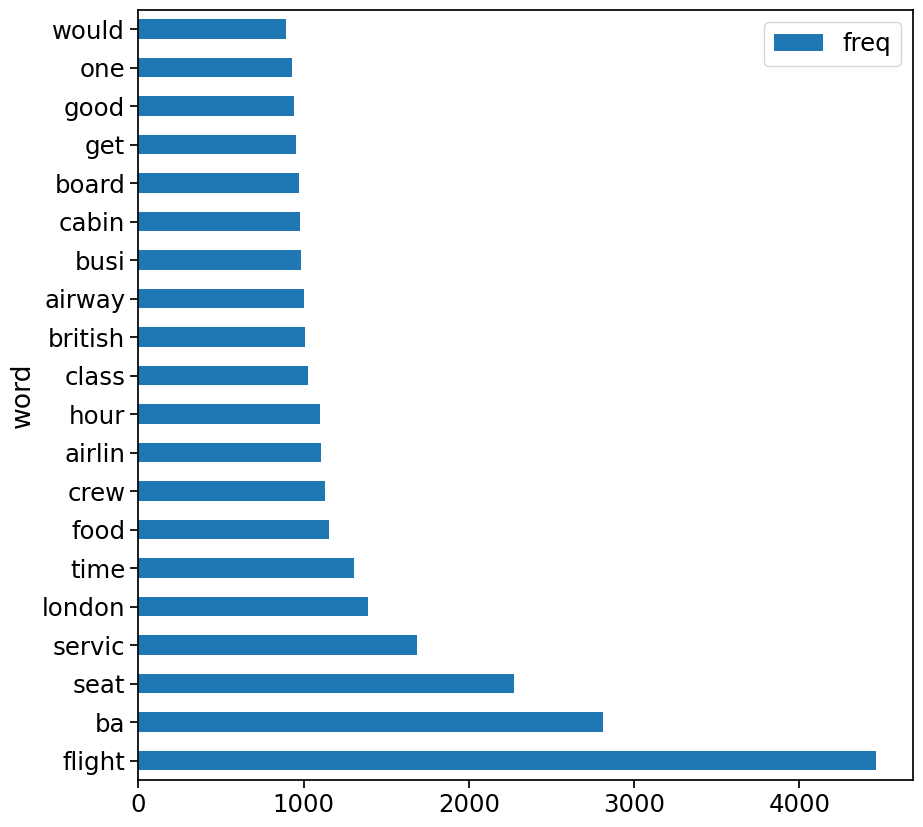

In [34]:
import seaborn as sns
sns.set_context(context = 'notebook', font_scale = 1.6)
freq_word[:20].plot(kind = 'barh',figsize = (10,10))

2. Polarity 

In [37]:
# Defining polarity function
from textblob import TextBlob
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
    
def tag_calc(num):
    if num < 0:
        return "Negative"
    elif num > 0:
        return "Positive"
    else:
        return "Neutral"

In [55]:
# Creating tags
df["polarity"] = df["reviews"].apply(polarity_calc)
df["tag"] = df["polarity"].apply(tag_calc)
df.head(10)

,reviews,polarity,tag
0,rout fli regular use first class secur loung good loung surpris busi great see depart dread bus gate flight time board readi go time six passeng show minut delay offload bag depart longer actual flight better process fast track henc final arriv pari min late plus side cabin crew great even person welcom inflight manag happen le le day,0.295000,Positive
1,ba may made posit improv club world product world travel product cater leaf much desir first meal servic slow hour serv meal portion incred small chicken dish contain mayb piec chicken piec broccoli piec unknown food small snack avail flight real let snack land vancouv bizarr tast chicken pastri wrap much chicken tast like pastri sweet mushi salti seat although exact spacious toler although aisl narrow cabin crew passeng frequent bump walk aisl cabin crew general respons passeng request twice flight came aisl drink howev poor level cater made frustrat trip certain recommend ba,-0.126984,Negative
2,british airway new club suit mark improv older club world seat new club suit offer fair amount privaci especi screen door close includ direct aisl access fulli reclin seat convert fair spacious bed although found surfac side bit hard uncomfort sleep cater board fair good tasti appet main cours general well cook although cabin crew slow meal servic took almost hour departur vancouv meal servic complet prior arriv light breakfast serv contain croissant small egg bacon sandwich mango pure ba cater flight general good unfortun upon arriv heathrow passeng wait minut check baggag arriv explan given singl member ground staff came assist passeng provid inform check baggag would arriv frustrat end otherwis fair enjoy trip club world left poor last impress ba,0.199112,Positive
3,four pleasant time flight friend help staff guy lhrsfo leg except regret forgotten name negat food sfolhr leg advertis filet steak akin stew steak ined sad occas food usuk flight sub standard otherwis happi recommend ba,0.077778,Positive
4,travel extens year tend use ba regular trip possibl recent year overal good servic howev recent experienc flight delay oper issu flight cancel poor checkin experi etc last two recent trip one zurich anoth iceland cancel return flight hour prior schedul departur time despit flight show time problem report return iceland experi one worst ever ba flight cancel due oper reason made matter wors occas flight quit earli went bed around pm night check flight show time issu report went sleep fair rest assur flight would fine woke discov flight cancel without warn left virtual return flight option day soon got wors earliest flight option offer ba day later opt choos tuesday ba left option act quick tuesday avail sure sell leav u return option wednesday onward experienc problem ba zurich back decemb lucki occas ba offer sever flight back day zurich case iceland left right predica hotel avail iceland limit non exist given short notic cancel flight hotel fulli book hire car return airport logist point view complet nightmar rebook anoth hire car find altern hotel decid search indirect flight onlin get u back uk sooner anoth airlin good half hour search came across indirect flight gatwick norwegian air went via oslo total journey time hour ideal car heathrow assess option virtual none guarante flight ba tuesday would also proceed time check norwegian air flight time look promis decid get book addit expens £ stay iceland would also incur addit cost fight back ba insur compani prioriti return home asap import work person commit monday return asap eventu flew back fine norwegian air servic receiv far superior ba board process slick flight compar complet shambl ba norwegian air offer full food trolley servic soft drink tea also rang alcohol drink compar water snack bar ba flight time eventu land gatwick short expect arriv time got back late home book hire car gatwick morn contact ba cancel altern tuesday flight,0.094303,Positive
5,flight delay hour due bad weather around jfk how

In [54]:
df["tag"].value_counts(normalize=True).reset_index()

,tag,proportion
0,Positive,0.675
1,Negative,0.292
2,Neutral,0.033


In [66]:
# Top 20 frequent word for positive sentiment
freq_word_postive = freq_check(df["reviews"].where(df["tag"] == "Positive"))
freq_word_postive.head(20)

,freq
word,
flight,3032
ba,1968
seat,1630
servic,1176
london,947
time,939
crew,906
good,895
food,880


In [67]:
# Top 20 frequent word for negative sentiment
freq_word_negative = freq_check(df["reviews"].where(df["tag"] == "Negative"))
freq_word_negative.head(20)

,freq
word,
flight,1331
ba,786
seat,601
servic,486
hour,422
london,405
airlin,363
time,352
british,343


In [68]:
# Top 20 frequent word for positive sentiment
freq_word_neutral = freq_check(df["reviews"].where(df["tag"] == "Neutral"))
freq_word_neutral.head(20)

,freq
word,
flight,104
ba,58
seat,45
london,38
airway,29
british,29
servic,25
busi,25
custom,25


3. Visualization

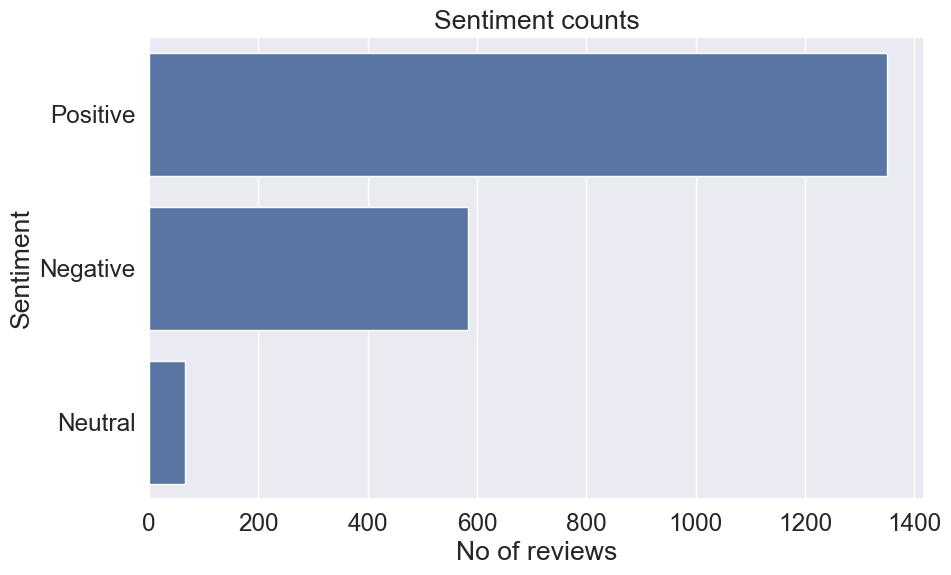

In [69]:
# Visualizing with bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=df['tag'].value_counts().values, y=df['tag'].value_counts().index, orient='h')
plt.ylabel("Sentiment")
plt.xlabel("No of reviews")
plt.title("Sentiment counts")
plt.show()

In [70]:
from wordcloud import WordCloud

def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

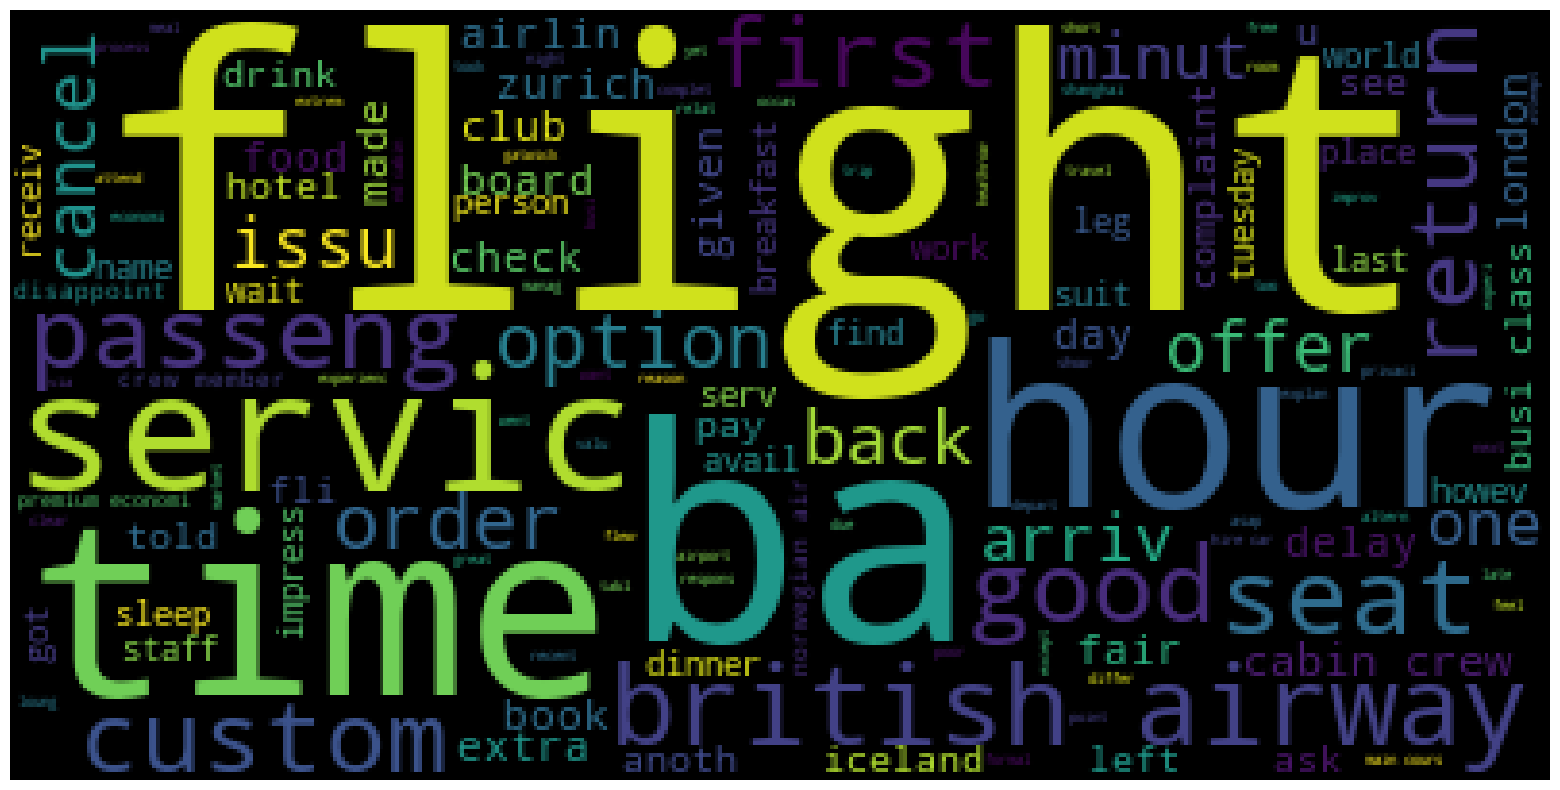

In [77]:
# World cloud positive sentiment
word_cloud_positive = WordCloud().generate(str(df[df['tag'] == 'Positive']['reviews']))
plot_cloud(word_cloud_positive)

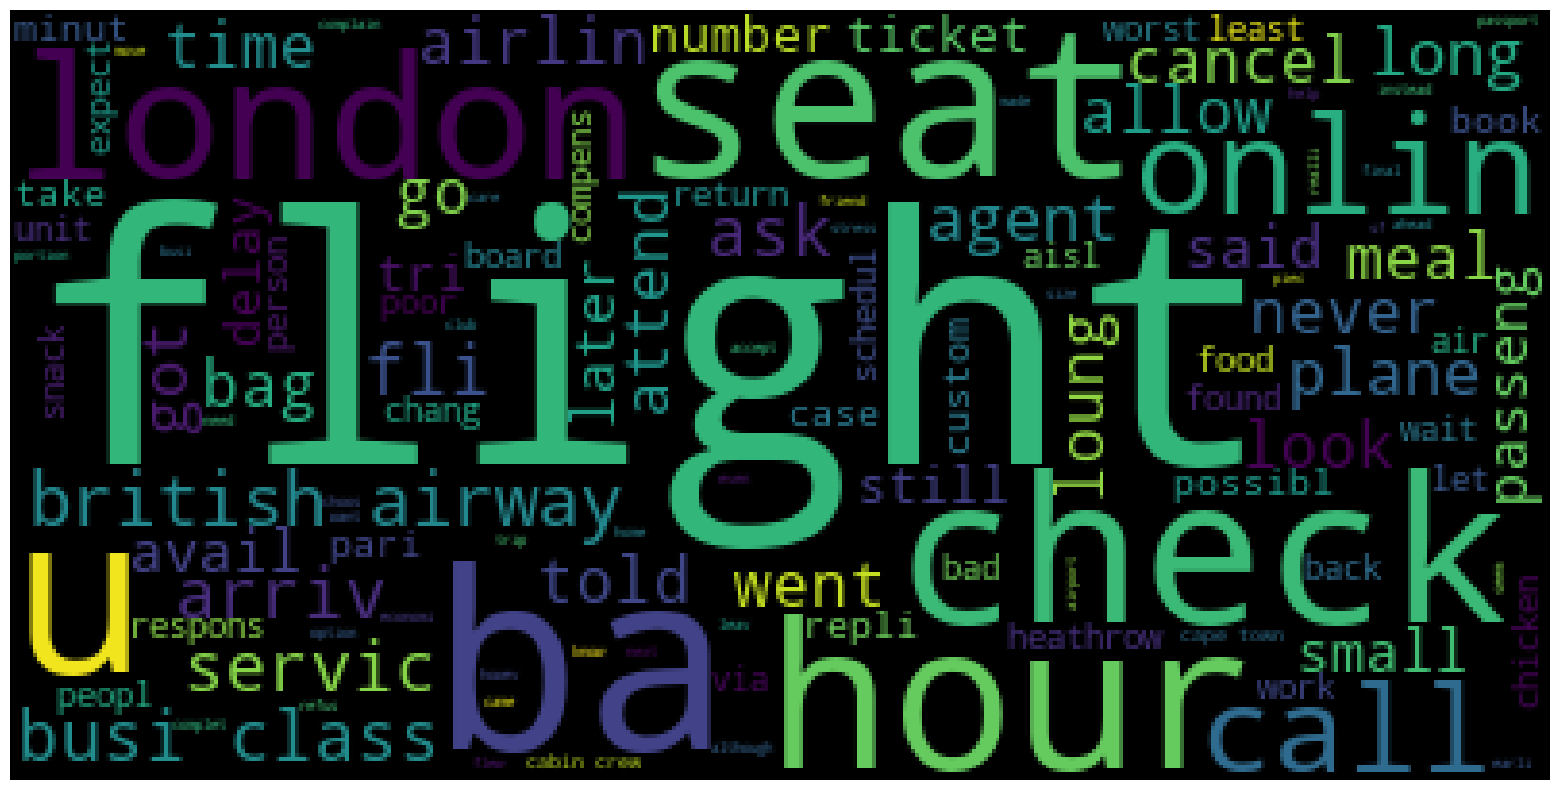

In [72]:
# World cloud negative sentiment
word_cloud_negative = WordCloud().generate(str(df[df['tag'] == 'Negative']['reviews']))
plot_cloud(word_cloud_negative)

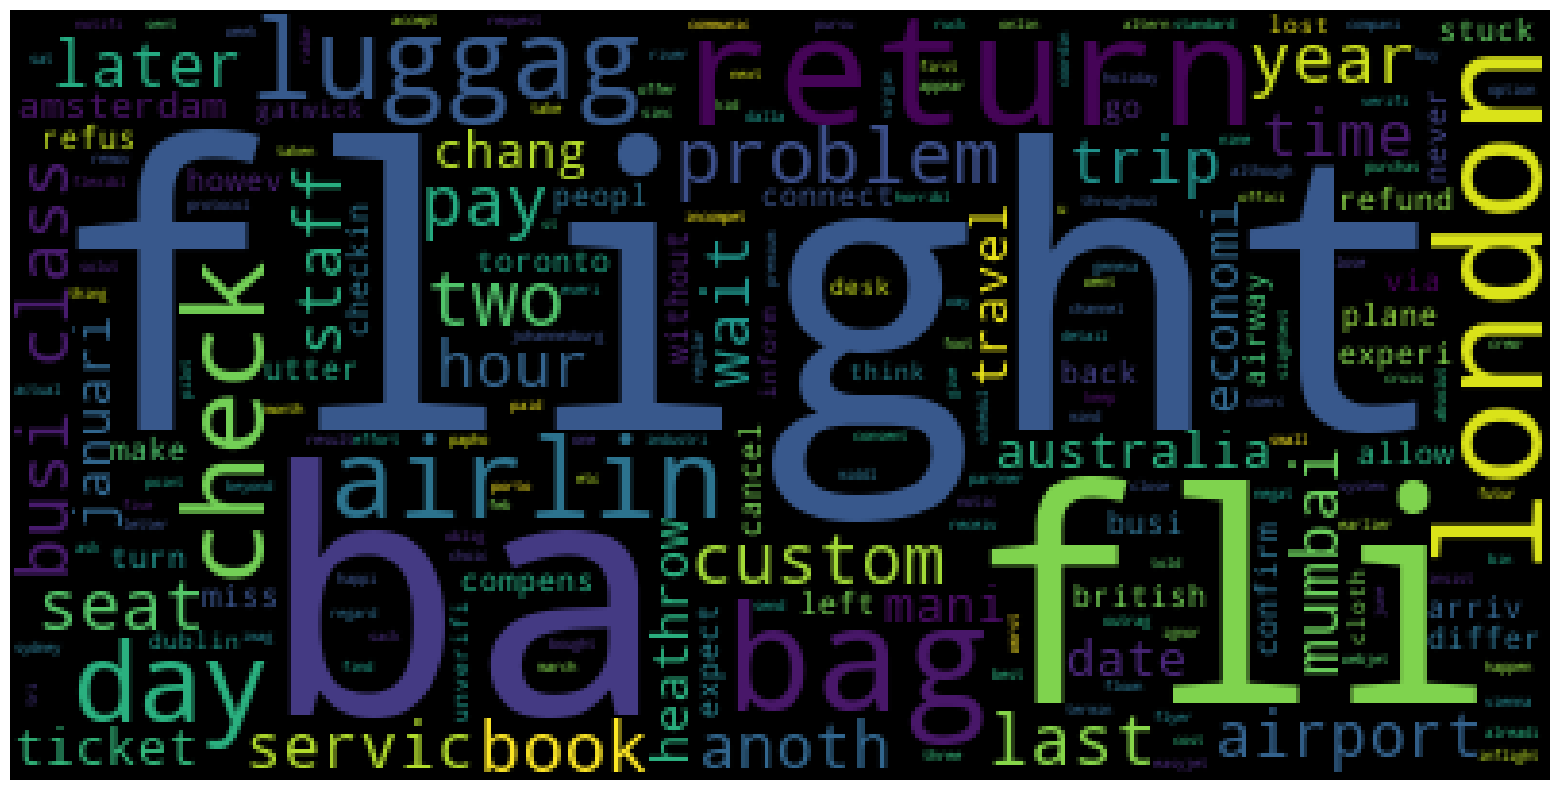

In [74]:
# World cloud neutral sentiment
word_cloud_neutral = WordCloud().generate(str(df[df['tag'] == 'Neutral']['reviews']))
plot_cloud(word_cloud_neutral)